In [ ]:
!python --version

Python 3.7.15


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#import pandas to read the csv file
import pandas as pd
import numpy as np

Mounted at /content/drive


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.externals import joblib

In [ ]:
import joblib

In [ ]:
#reading the y.txt file which contains labels
y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])

In [ ]:
y

,Complexity,Node Number,Language
0,O(1),nodes0,C
1,O(2n),nodes0,C
2,O(2n),nodes1,C
3,O(logN),nodes0,C
4,O(logN),nodes1,C
...,...,...,...
735,O(NlogN),nodes5,Java
736,O(NlogN),nodes6,Java
737,O(NlogN),nodes7,Java
738,O(NlogN),nodes8,Java


In [ ]:
x = np.load('/content/drive/MyDrive/x.npy')

In [ ]:
x

array([[-0.05468176,  0.127175  ,  0.0366478 , ...,  0.09731236,
        -0.107657  ,  0.08184043],
       [-0.0952346 ,  0.17503381,  0.06393544, ...,  0.1181241 ,
        -0.12556435,  0.13071893],
       [-0.13581266,  0.21943617,  0.10214286, ...,  0.1283566 ,
        -0.14471857,  0.19222681],
       ...,
       [ 0.18476942, -0.20165125, -0.23536444, ...,  0.23089787,
        -0.3212845 , -0.2662279 ],
       [ 0.25568134, -0.19382419, -0.3828221 , ...,  0.27317905,
        -0.33641592, -0.30042982],
       [ 0.78257215, -0.16311097, -0.7386889 , ...,  0.5125705 ,
        -0.17265631, -0.5655121 ]], dtype=float32)

In [ ]:
df = []
for i in range(len(x)):
  emb = x[i].tolist()
  # emb.append(y[i])
  df.append(emb)
col = []
for i in range(128):
  col.append('emb'+str(i+1))
# col.append('classes')
df = pd.DataFrame(df, columns=col)

In [ ]:
df

,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,...,emb119,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128
0,-0.054682,0.127175,0.036648,0.090353,0.192498,0.043540,-0.060334,-0.037632,-0.001838,0.116995,...,-0.125052,-0.049275,-0.131080,0.002272,-0.017875,-0.209266,0.199226,0.097312,-0.107657,0.081840
1,-0.095235,0.175034,0.063935,0.117448,0.255929,0.064811,-0.072923,-0.032716,0.013575,0.152739,...,-0.191601,-0.024092,-0.185713,-0.016963,-0.040366,-0.277818,0.261729,0.118124,-0.125564,0.130719
2,-0.135813,0.219436,0.102143,0.135153,0.286394,0.068151,-0.078952,-0.003041,0.021949,0.182400,...,-0.259607,0.008541,-0.236532,-0.032249,-0.071049,-0.334604,0.334102,0.128357,-0.144719,0.192227
3,0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,-0.061681,...,-0.392645,-0.586666,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675
4,0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,0.019773,...,-0.449514,-0.386576,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,0.257494,...,-0.329598,-0.397525,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609
736,0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,0.159889,...,-0.263365,-0.445122,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131
737,0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,0.205073,...,-0.239681,-0.489142,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228
738,0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,0.150684,...,-0.323401,-0.498780,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430


In [ ]:
df_y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])

In [ ]:
df['Complexity'] = df_y['Complexity']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


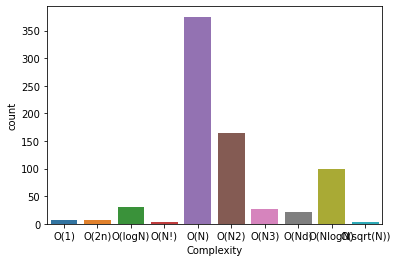

In [ ]:
import seaborn as sns
sns.countplot(df['Complexity'])

# **Resampling - Oversampling**

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Complexity'] == 'O(N)')] 
df_minority_1 = df[(df['Complexity'] == 'O(N2)')] 
df_minority_2 = df[(df['Complexity'] == 'O(NlogN)')] 
df_minority_3 = df[(df['Complexity'] == 'O(logN)')] 
df_minority_4 = df[(df['Complexity'] == 'O(N3)')]
df_minority_5 = df[(df['Complexity'] == 'O(Nd)')]
df_minority_6 = df[(df['Complexity'] == 'O(2n)')]
df_minority_7 = df[(df['Complexity'] == 'O(1)')]
df_minority_8 = df[(df['Complexity'] == 'O(N!)')]
df_minority_9 = df[(df['Complexity'] == 'O(sqrt(N))')]

# upsample minority class
minority = [df_minority_1, df_minority_2, df_minority_3, df_minority_4, df_minority_5, df_minority_6, df_minority_7, df_minority_8, df_minority_9]
temp = []
for i in minority:
  df_minority_upsampled = resample(i, 
                                  replace=True,    # sample with replacement
                                  n_samples= 375, # to match majority class
                                  random_state=42)  # reproducible results
  temp.append(df_minority_upsampled)
# Combine majority class with upsampled minority class
df_upsampled = df_majority
for i in temp:
  df_upsampled = pd.concat([i, df_upsampled])

In [ ]:
df_upsampled['Complexity'].value_counts()

O(sqrt(N))    375
O(N!)         375
O(1)          375
O(2n)         375
O(Nd)         375
O(N3)         375
O(logN)       375
O(NlogN)      375
O(N2)         375
O(N)          375
Name: Complexity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


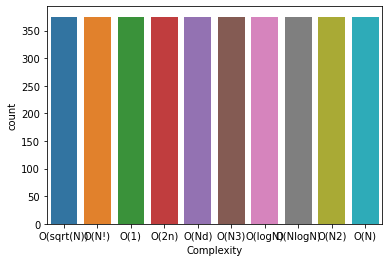

In [ ]:
sns.countplot(df_upsampled['Complexity'])

In [ ]:
df = df_upsampled
# df = oversampled
factor = pd.factorize(df['Complexity'])
df.Complexity= factor[0]
definitions = factor[1]
print(df.Complexity.head())
print(definitions)

426    0
118    0
426    0
426    0
118    0
Name: Complexity, dtype: int64
Index(['O(sqrt(N))', 'O(N!)', 'O(1)', 'O(2n)', 'O(Nd)', 'O(N3)', 'O(logN)',
       'O(NlogN)', 'O(N2)', 'O(N)'],
      dtype='object')


In [ ]:
#Splitting the data into independent and dependent variables
X = df.iloc[:,0:128].values
y = df.iloc[:,128].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])

The independent features set: 
[[-5.83184287e-02  3.71529967e-01 -2.88323965e-02  1.55028060e-01
   3.11014682e-01  1.00550026e-01  5.99360764e-02 -3.60761136e-01
   1.44105852e-01  3.35489400e-02 -3.26490730e-01 -1.46469802e-01
  -1.58249080e-01  8.42799172e-02 -1.56572074e-01 -6.25618100e-02
   1.79115199e-02 -6.21027872e-02 -4.91600335e-02  3.89916211e-01
  -1.46600425e-01  8.72108266e-02 -6.90339282e-02 -1.86637864e-01
   4.93713245e-02  4.02110219e-02  1.68428034e-01  1.20966127e-02
  -5.01116753e-01  2.01332048e-01 -1.36490002e-01 -5.06071329e-01
   1.30972713e-01  3.99992436e-01 -5.79397716e-02  2.12425098e-01
   2.67079026e-01  7.10954294e-02  3.29857349e-01  2.58917511e-01
   1.54078141e-01 -3.46699953e-01  5.03761582e-02 -1.37354985e-01
  -1.46855399e-01  2.39136890e-01  1.41890749e-01 -2.20331624e-01
   1.15752794e-01  2.84888089e-01 -1.10822842e-01 -4.63338494e-01
   2.44946837e-01  4.53784674e-01  1.73191175e-01 -9.71864909e-02
   1.07007056e-01  1.23845637e-01  4.40136716

In [ ]:
y = df['Complexity']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 21)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_results = pd.DataFrame()
model_results['models'] = ['Random Forest','Adaboost','XGBoost','KNN','Logistic Regression','Naive Bayes']
acc = []
prec = []
rec = []
f1 = []
kap = []
roc = []

# Random forest

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
num_classes = len(set(df_upsampled['Complexity']))
num_classes

10

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[125,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 143,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 133,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 134,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 142,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 140,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 121,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 113,   1,   2],
       [  0,   0,   0,   0,   1,   0,   0,   3, 122,   2],
       [  0,   0,   2,   2,   1,   0,   6,  12,  21,  87]])

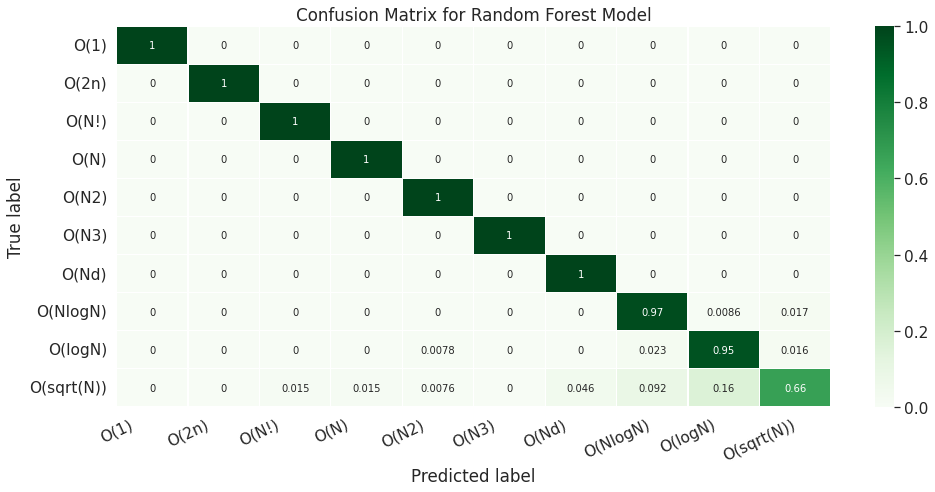

In [ ]:
# Get and reshape confusion matrix data
import matplotlib.pyplot as plt
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['O(1)',  'O(2n)',  'O(N!)',  'O(N)',  'O(N2)',  'O(N3)',  'O(Nd)',  'O(NlogN)', 'O(logN)','O(sqrt(N))']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

0.9596344249809596

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       143
           2       0.99      1.00      0.99       133
           3       0.99      1.00      0.99       134
           4       0.99      1.00      0.99       142
           5       1.00      1.00      1.00       140
           6       0.95      1.00      0.98       121
           7       0.88      0.97      0.93       116
           8       0.85      0.95      0.90       128
           9       0.96      0.66      0.78       131

    accuracy                           0.96      1313
   macro avg       0.96      0.96      0.96      1313
weighted avg       0.96      0.96      0.96      1313



In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
# smote_obj = SMOTE()
# X_train, y_train = smote_obj.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(2437, 128)

In [ ]:
y_train.shape

(2437,)

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_test

array([1, 4, 6, ..., 8, 3, 1])

In [ ]:
y_pred

array([1, 4, 6, ..., 8, 3, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.96%


In [ ]:
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn import metrics
labels=['0','1','2','3','4']
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, predictions))
#print("Kappa score:" + cohen_kappa_score(y_test, y_pred,average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       143
           2       0.99      1.00      0.99       133
           3       0.99      1.00      0.99       134
           4       0.99      1.00      0.99       142
           5       1.00      1.00      1.00       140
           6       0.95      1.00      0.98       121
           7       0.88      0.97      0.93       116
           8       0.85      0.95      0.90       128
           9       0.96      0.66      0.78       131

    accuracy                           0.96      1313
   macro avg       0.96      0.96      0.96      1313
weighted avg       0.96      0.96      0.96      1313

0.9615100810550229
0.9596344249809596
0.9573772062333501
0.9551357101411901


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = classifier.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9974610110386641

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, predictions))
roc.append(weighted_roc_auc_ovo)

In [ ]:
# joblib.dump(classifier, "/content/drive/MyDrive/Capstone/random_forest.joblib")

In [ ]:
# loaded_rf = joblib.load("/content/drive/MyDrive/Capstone/random_forest_GridSearch.joblib")

In [ ]:
# x_new = np.load('/content/drive/MyDrive/x_new.npy')
# df = []
# x = x_new
# for i in range(len(x)):
#     emb = x[i].tolist()
#     # emb.append(y[i])
#     df.append(emb)
# col = []
# for i in range(128):
#     col.append('emb'+str(i+1))
# # col.append('classes')
# df = pd.DataFrame(df, columns=col)

# X_new = df.iloc[:,0:128].values

In [ ]:
# y_pred = loaded_rf.predict(X_new)
# y_pred

# Adaboost

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

In [ ]:

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=300)

In [ ]:
y_pred = bdt_real.predict(X_test) 
y_pred1 = bdt_discrete.predict(X_test) 

In [ ]:
predictions = [round(value) for value in y_pred]

In [ ]:
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1,average='weighted'))
print(recall_score(y_test, y_pred1,average='weighted'))
print(f1_score(y_test, y_pred1,average='weighted'))
print(cohen_kappa_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       134
           4       0.94      0.62      0.75       142
           5       0.97      0.70      0.81       140
           6       0.96      0.90      0.93       121
           7       0.75      0.69      0.72       116
           8       0.44      0.59      0.50       128
           9       0.48      0.70      0.57       131

    accuracy                           0.82      1313
   macro avg       0.85      0.82      0.83      1313
weighted avg       0.86      0.82      0.83      1313

0.8202589489718203
0.8575240600526802
0.8202589489718203
0.8297388211580045
0.44510774069747494


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = bdt_real.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.8042104699451055

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, predictions))
roc.append(weighted_roc_auc_ovo)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost

In [ ]:
import xgboost as xgb

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

model = XGBClassifier() 
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred = model.predict(X_test) 

predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.27%


In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn import metrics
labels=['0','1','2','3','4']
print(classification_report(y_test, y_pred))
print(precision_score(y_test, predictions,average='weighted'))
print(recall_score(y_test, predictions,average='weighted'))
print(f1_score(y_test, predictions,average='weighted'))
print(cohen_kappa_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00       133
           3       0.99      1.00      1.00       134
           4       0.97      1.00      0.98       142
           5       0.98      1.00      0.99       140
           6       0.98      1.00      0.99       121
           7       0.92      0.93      0.93       116
           8       0.86      0.94      0.90       128
           9       0.92      0.75      0.82       131

    accuracy                           0.96      1313
   macro avg       0.96      0.96      0.96      1313
weighted avg       0.96      0.96      0.96      1313

0.9625855458896853
0.9626808834729627
0.9615798881503256
0.9585146601480362


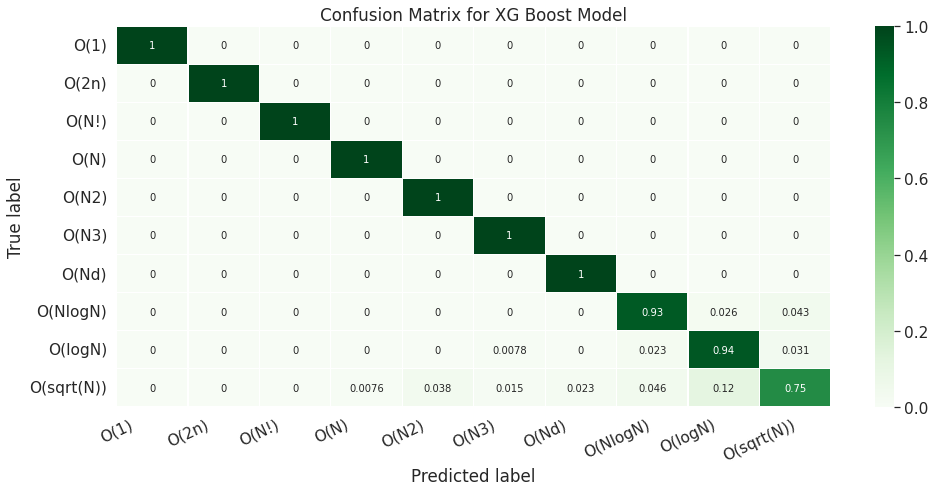

In [ ]:
# Get and reshape confusion matrix data
import matplotlib.pyplot as plt
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['O(1)',  'O(2n)',  'O(N!)',  'O(N)',  'O(N2)',  'O(N3)',  'O(Nd)',  'O(NlogN)', 'O(logN)','O(sqrt(N))']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XG Boost Model')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9976149168915479

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, predictions))
roc.append(weighted_roc_auc_ovo)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)
print(precision_score(y_test, ypred,average='weighted'))
print(recall_score(y_test, ypred,average='weighted'))
print(f1_score(y_test, ypred,average='weighted'))
print(cohen_kappa_score(y_test, ypred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00       133
           3       0.92      1.00      0.96       134
           4       0.87      1.00      0.93       142
           5       0.86      1.00      0.93       140
           6       0.95      1.00      0.98       121
           7       0.74      0.78      0.76       116
           8       0.68      0.71      0.69       128
           9       0.77      0.34      0.47       131

    accuracy                           0.89      1313
   macro avg       0.88      0.88      0.87      1313
weighted avg       0.88      0.89      0.87      1313

Accuracy: 0.8857578065498858
0.8810590939936409
0.8857578065498858
0.8734868009035143
0.8729794084110268


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9819878634241981

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, predictions))
roc.append(weighted_roc_auc_ovo)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,multi_class="multinomial")
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
y_pred 

array([1, 8, 6, ..., 8, 3, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       0.99      1.00      1.00       143
           2       0.98      1.00      0.99       133
           3       0.96      1.00      0.98       134
           4       0.84      0.92      0.88       142
           5       0.93      0.96      0.94       140
           6       0.97      0.94      0.95       121
           7       0.71      0.77      0.74       116
           8       0.75      0.76      0.75       128
           9       0.82      0.60      0.70       131

    accuracy                           0.90      1313
   macro avg       0.89      0.89      0.89      1313
weighted avg       0.90      0.90      0.89      1313

Accuracy: 0.8971820258948972
0.8965974573243044
0.8971820258948972
0.894859550853779
0.8856984225859994


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9819878634241981

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, predictions))
roc.append(weighted_roc_auc_ovo)

# Naive Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train,y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

In [ ]:
y_pred = p.predict(X_test)
y_pred 

array([1, 0, 6, ..., 3, 3, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.63      0.27       125
           1       1.00      0.71      0.83       143
           2       0.63      0.81      0.71       133
           3       0.34      0.40      0.37       134
           4       0.00      0.00      0.00       142
           5       0.60      0.41      0.49       140
           6       0.76      0.61      0.68       121
           7       0.33      0.17      0.23       116
           8       0.25      0.15      0.19       128
           9       0.34      0.21      0.26       131

    accuracy                           0.41      1313
   macro avg       0.44      0.41      0.40      1313
weighted avg       0.44      0.41      0.40      1313

Accuracy: 0.412033511043412
0.4448969125061999
0.412033511043412
0.4040787119094822
0.34772038430105734


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9819878634241981

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, predictions))
roc.append(weighted_roc_auc_ovo)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_results['Accuracy'] = acc
model_results['Prescision'] = prec
model_results['Recall'] = rec
model_results['F1'] = f1
model_results['Kappa'] = kap
model_results['ROC_AUC'] = roc

In [ ]:
model_results

,models,Accuracy,Prescision,Recall,F1,Kappa,ROC_AUC
0,Random Forest,0.959634,0.961510,0.959634,0.957377,0.955136,0.997461
1,Adaboost,0.502666,0.613497,0.502666,0.468786,0.445108,0.804210
2,XGBoost,0.962681,0.962586,0.962681,0.961580,0.958515,0.997615
3,KNN,0.962681,0.962586,0.962681,0.961580,0.958515,0.981988
4,Logistic Regression,0.897182,0.896597,0.897182,0.894860,0.958515,0.981988
5,Naive Bayes,0.412034,0.444897,0.412034,0.404079,0.958515,0.981988


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


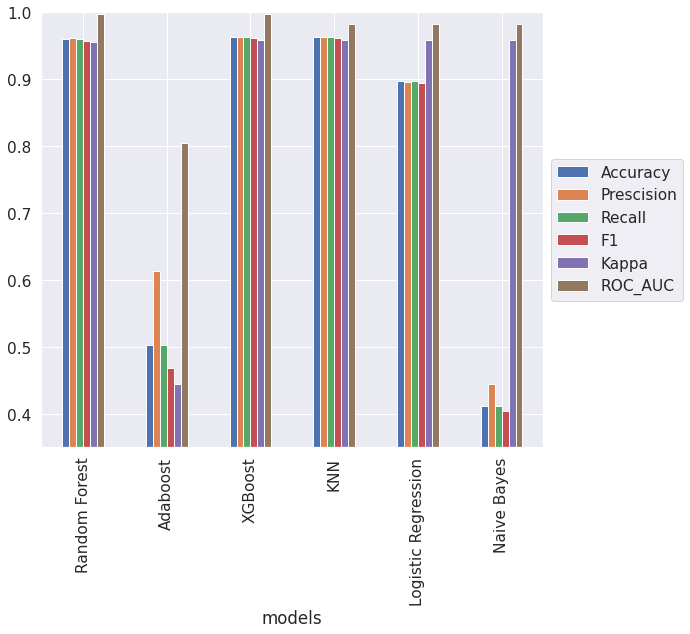

In [ ]:
fig = model_results.plot(x = "models", y = ['Accuracy',	'Prescision',	'Recall',	'F1',	'Kappa', 'ROC_AUC'], kind = "bar", figsize=(9, 8))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim([0.35,1])
plt.show()

# **Results**

---
1. Accuracy
2. Precision
3. Recall
4. F1 Score
5. Cohen Kappa Score
6. Roc auc Score
---
**Random Forest**

0.9573560767590619

0.9584976073991893

0.9573560767590619

0.9552754759579702

---
**Adaboost**

0.802771855010661

0.8534504944314486

0.802771855010661

0.8145437082907355

---
**XGBoost**

0.9658848614072495

0.965915211393339

0.9658848614072495

0.9649037802214644

0.9620538169314109

---
**KNN**

0.9008528784648188

0.9001685697973634

0.9008528784648188

0.8916125571931889

0.8896681342336884

---

**Logistic Regression**

0.9008528784648188

0.900135627354752

0.9008528784648188

0.8995841318871703

0.8897233666267618

---

**Naive Bayes**

0.4275053304904051

0.5715843473005865

0.4275053304904051

0.42702817370427987

0.3624604153007678

---